## Modeling and Simulation in Python

Project 3

Jinfay Yuan and Manu Patil

In [22]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import math
import matplotlib.pyplot as plt

from IPython.display import HTML

import array as arr
import matplotlib.pyplot as plt
import matplotlib.animation
np.random.seed(7)

In [23]:
N = UNITS.newton
kg = UNITS.kilogram
AU = UNITS.astronomical_unit
day = UNITS.day
m = UNITS.meter
s = UNITS.second
y = UNITS.year
degree = UNITS.degree

<Unit('degree')>

In [24]:
params = Params(Mass_Earth = 5.972e24 *kg,
                Mass_Moon = 7.3476730e22 *kg, 
                Mass_Satellite = 100 *kg,
                G = 6.674e-11* (N*m**2)/(kg**2),
                r_0 = 3449709330,#distance from center of Earth to Lagrange point
                t_0 = 0*s,
                t_end =2e6*s,
                v=10000*m/s,
                theta=30*degree)

,values
Mass_Earth,5.972e+24 kilogram
Mass_Moon,7.347673e+22 kilogram
Mass_Satellite,100 kilogram
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
r_0,3449709330
t_0,0 second
t_end,2000000.0 second
v,10000.0 meter / second
theta,30 degree


In [25]:
def make_system(params):
    unpack(params)


    init = State(x = 344970933 *m, 
                 y = 0*m ,
                 vx = v* math.cos(theta) *m/s ,
                 vy = v* math.sin(theta) *m/s ,
                 mx = 384472281 *m, #distance from Earth to Moon
                 my = 0*m,
                 mvx = 0 *m/s,
                 mvy = 1000 * m/s);

    return System(params,init=init)
system = make_system(params)

,values
Mass_Earth,5.972e+24 kilogram
Mass_Moon,7.347673e+22 kilogram
Mass_Satellite,100 kilogram
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
r_0,3449709330
t_0,0 second
t_end,2000000.0 second
v,10000.0 meter / second
theta,30 degree
init,x 344970933 me...


In [26]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy, mx, my, mvx, mvy = state
    unpack(system) 
    
    forceSatellite = Earth_fgrav(state,system) + Moon_fgrav(state,system)
    forceEarthMoon = Earth_fgravMoon(state,system)
    
    dxdt = vx 
    dydt = vy
    
    dvxdt = (forceSatellite.x) / Mass_Satellite
    dvydt = (forceSatellite.y) / Mass_Satellite
    
    dmxdt = mvx
    dmydt = mvy
    
    dmvxdt = (forceEarthMoon.x) / Mass_Moon
    dmvydt = (forceEarthMoon.y) / Mass_Moon
    

    
    return dxdt, dydt, dvxdt, dvydt,dmxdt, dmydt, dmvxdt, dmvydt

In [27]:
def fgrav(obj1_x, obj1_y, obj2_x, obj2_y, Mass_1, Mass_2):
    position = Vector(obj2_x-obj1_x, obj2_y-obj1_y) *m
    force = G * Mass_2 * Mass_1 / (position.mag)**2
    return  position.hat() * force

In [28]:
def Earth_fgravMoon(state,system):
    unpack (system)
    x,y,vx,vy,mx,my,mvx,mvy = state
    return fgrav(mx,my, 0, 0, Mass_Moon, Mass_Earth)
Earth_fgravMoon(system.init, system)

<Quantity([-1.98118829e+20  0.00000000e+00], 'newton / meter ** 2')>

In [29]:
def Earth_fgrav(state,system):
    unpack (system)
    x,y,vx,vy,mx,my,mvx,mvy = state
    return fgrav(x,y, 0, 0, Mass_Satellite, Mass_Earth)
Earth_fgrav(system.init, system)

<Quantity([-0.33491993  0.        ], 'newton / meter ** 2')>

In [30]:
def Moon_fgrav(state,system):
    unpack (system)
    x,y,vx,vy,mx,my,mvx,mvy = state
    return fgrav(x,y, mx, my, Mass_Satellite, Mass_Moon)
Moon_fgrav(system.init, system)

<Quantity([0.3142767 0.       ], 'newton / meter ** 2')>

In [31]:
def event_func(state, t, system): # Checks crash into Moon
    unpack (system)
    x,y,vx,vy,mx,my,mvx,mvy = state
    position = Vector(mx-x, my-y) *m
    return position.mag /m - 1737000*m
event_func(system.init, 0, system)

<Quantity(37764348.0, 'meter')>

In [32]:
def event_func1(state, t, system): # Checks crash into Earth
    unpack (system)
    x,y,vx,vy,mx,my,mvx,mvy = state
    position = Vector(0-x, 0-y) *m
    return position.mag /m - 6371000*m
event_func1(system.init, 0, system)

<Quantity(338599933.0, 'meter')>

In [33]:
params1 = Params(params, v = 500*m/s)
print(params1)
system = make_system(params1)
slope_func(system.init, 0, system)

Mass_Earth                                   5.972e+24 kilogram
Mass_Moon                                 7.347673e+22 kilogram
Mass_Satellite                                     100 kilogram
G                 6.674e-11 meter ** 2 * newton / kilogram ** 2
r_0                                                  3449709330
t_0                                                    0 second
t_end                                          2000000.0 second
v                                          500.0 meter / second
theta                                                 30 degree
dtype: object


(<Quantity(433.01270189221935, 'meter ** 2 / second ** 2')>,
 <Quantity(249.99999999999997, 'meter ** 2 / second ** 2')>,
 <Quantity(-0.00020643228302136274, 'newton / kilogram / meter ** 2')>,
 <Quantity(0.0, 'newton / kilogram / meter ** 2')>,
 <Quantity(0.0, 'meter / second')>,
 <Quantity(1000.0, 'meter / second')>,
 <Quantity(-0.002696347936647311, 'newton / kilogram / meter ** 2')>,
 <Quantity(0.0, 'newton / kilogram / meter ** 2')>)

In [34]:
results1, details = run_ode_solver(system, slope_func,events = [event_func,event_func1], method = "LSODA")
details

,values
sol,None
t_events,"[[], []]"
nfev,459
njev,7
nlu,7
status,0
message,The solver successfully reached the end of the...
success,True


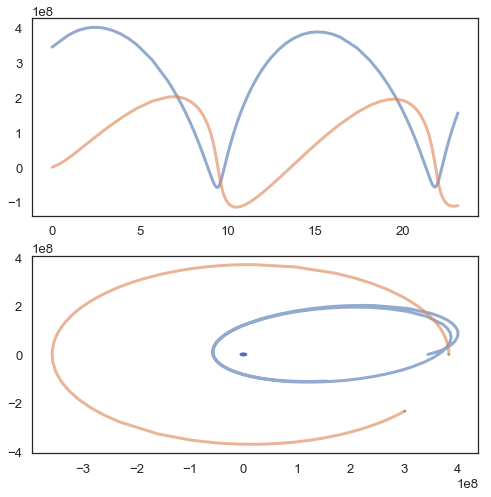

In [35]:
def plot_position(results):
    unpack(system)
    count = 1
    
 
    subplot(2,1,1) # Plots x and y over time. Not terribly useful
    for result in results:
        result.index /= 60*60*24 #convert seconds to days

        plot(result.x, label='x'+str(count))
        plot(result.y, label = 'y'+ str(count))
        count +=1
    #decorate(xlabel='Time (days)',ylabel='Distance from earth (million m)')
    
    subplot(2,1,2) #Plots x against y creating 
    count = 1
    fig = plt.gcf()
    ax = fig.gca()
    circle1 = plt.Circle((384472281, 0), 1736482, color='g',label = "Moon Start")
    circle2 = plt.Circle((0, 0), 6371000, color='b', label = "Earth")
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    for result in results:
        plot(result.x,result.y, label = 'Position'+str(count))
        plot(result.mx,result.my, label = 'Moon Path' + str(count))
        circle = plt.Circle((get_last_value(result.mx), get_last_value(result.my)), 1736482, color='r',label = "Moon End"+str(count))
        ax.add_artist(circle)
        count +=1

    #decorate(xlabel='x Distance from earth (m)',ylabel='y Distance from earth (m)')
plot_position([results1])

In [ ]:
angles = [-10,-20,10,20,30,40,50,60]
sweep = SweepSeries()
for angle in angles:
    params = Params(params, v = 500*m/s, theta = -30 * degree, t_end = 2100000*s)
    system = make_system(params)
    result, details = run_ode_solver(system, slope_func, events = [event_func,event_func1], method = "LSODA")
    plot(result.x,result.y)



In [37]:
def Distance_func(angle, params):  
    """Computes range for a given launch angle.
    
    angle: launch angle in degrees
    params: Params object
    
    returns: distance in meters
    """

    newTheta = params.theta + angle*degree
    params = Params(params, theta = newTheta)
    system = make_system(params)
    ts = linspace(0, system.t_end, 100)
    
    results, details = run_ode_solver(system, slope_func, events = [event_func,event_func1], method = "LSODA", t_eval = ts)
    minVal = math.sqrt(get_first_value(results.x)**2 + get_first_value(results.y)**2)
    for i in results.index:
        value = (math.sqrt(results.x[i]**2 +results.y[i]**2))
        if (minVal > value):
            minVal = value
    return minVal

In [38]:
Distance_func(45,params)

29812589.859663624

In [39]:
res = min_bounded(Distance_func, [0, 80], params)

,values
fun,1.44084e+07
status,0
success,True
message,Solution found.
x,37.9755
nfev,25


In [40]:
res.x

37.97548103463952

45.95096206927904 degree
500.0 meter / second


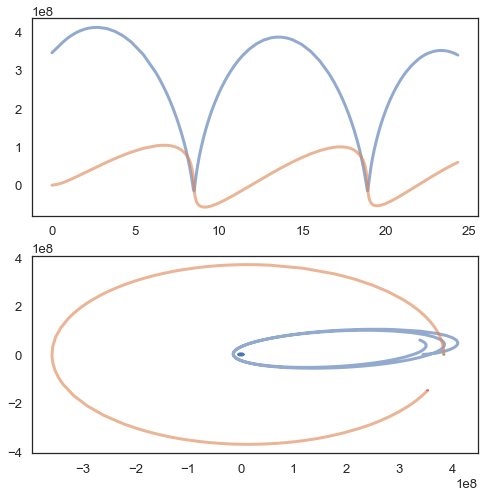

In [41]:
params = Params(params, theta = (params.theta + res.x*degree))
print(params.theta + res.x*degree)
print(v)
system = make_system(params)
results4, details = run_ode_solver(system, slope_func, events=[event_func,event_func1], method = "LSODA")
plot_position([results4])

In [42]:
def Velocity_func(velocity, params):  
    """Computes range for a given launch angle.
    
    angle: launch angle in degrees
    params: Params object
    
    returns: distance in meters
    """

    newV = params.v + velocity *m/s
    params = Params(params, v = newV)
    system = make_system(params)
    ts = linspace(0, system.t_end, 100)
    
    results, details = run_ode_solver(system, slope_func, events = [event_func,event_func1], method = "LSODA", t_eval = ts)
    minVal = math.sqrt(get_first_value(results.x)**2 + get_first_value(results.y)**2)
    for i in results.index:
        value = (math.sqrt(results.x[i]**2 +results.y[i]**2))
        if (minVal > value):
            minVal = value
    return minVal

In [43]:
Velocity_func(400,params)

38737779.11268909

In [44]:
res = min_bounded(Velocity_func, [-10000, 10000], params)

,values
fun,3.59851e+07
status,0
success,True
message,Solution found.
x,-5648.23
nfev,17


In [45]:
res.x

-5648.226359445424

-5148.226359445424 meter / second


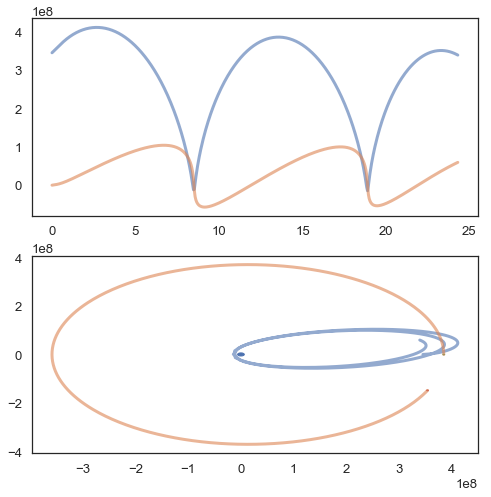

In [46]:
params = Params(params, velocity = params.v + res.x *m/s)
print(params.v + res.x *m/s)
system = make_system(params)
ts = linspace(0,system.t_end, 500)
results5, details = run_ode_solver(system, slope_func, events=[event_func,event_func1], method = "LSODA", t_eval = ts)
plot_position([results5])

Course Corrections

In [47]:
# Add Vector in direction in random direction in a range of velocties.

In [48]:
def make_system2(mEarth, mMoon, mSatellite, G, r_0, v,theta, t_end):

    rad = (theta/180) * pi
    
    init = State(x = 344970933 *m, 
                 y = 0*m ,
                 vx = v* math.cos(rad) *m/s ,
                 vy = v* math.sin(rad) *m/s ,
                 xi = 344970933 *m, 
                 yi = 0*m ,
                 vxi = v* math.cos(rad) *m/s ,
                 vyi = v* math.sin(rad) *m/s ,
                 mx = 384472281 *m, #distance from Earth to Moon
                 my = 0*m,
                 mvx = 0 *m/s,
                 mvy = 1000 * m/s);

    
    t_0 = 0 *s
    t_end = t_end *s
    
    
    return System(init=init,
                mEarth = mEarth,
                mMoon = mMoon,
                mSatellite = mSatellite,
                G = G,
                t_0 = t_0,
                t_end=t_end)
system = make_system2(Mass_Earth, Mass_Moon, Mass_Satellite, G, r_0, 100, 100, 1000)

,values
init,x 344970933 meter y ...
mEarth,5.972e+24 kilogram
mMoon,7.347673e+22 kilogram
mSatellite,100 kilogram
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
t_0,0 second
t_end,1000 second


In [49]:
def slope_func2(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy, xi, yi, vxi, vyi, mx, my, mvx, mvy = state
    unpack(system) 
    
    forceSatellite = Earth_fgrav(state,system) + Moon_fgrav(state,system)
    forceEarthMoon = Earth_fgravMoon(state,system)
    forceSatellitei = Earth_fgrav_ideal(state,system) + Moon_fgrav_ideal(state,system)

    if t == 0:
        explosion =  forceOxygen_Explosion()
        print(explosion)
    else:
        explosion = Vector(0,0) *m;
    
    dxdt = vx 
    dydt = vy
    
    dvxdt = (forceSatellite.x + explosion.x) / Mass_Satellite
    dvydt = (forceSatellite.y + explosion.y) / Mass_Satellite
    
    dxidt = vxi 
    dyidt = vyi
    
    dvxidt = (forceSatellitei.x) / Mass_Satellite
    dvyidt = (forceSatellitei.y) / Mass_Satellite
    
    dmxdt = mvx
    dmydt = mvy
    
    dmvxdt = (forceEarthMoon.x) / Mass_Moon
    dmvydt = (forceEarthMoon.y) / Mass_Moon
    

    return dxdt, dydt, dvxdt, dvydt, dxidt, dyidt, dvxidt, dvyidt, dmxdt, dmydt, dmvxdt, dmvydt

In [50]:
def forceOxygen_Explosion():
    direction = np.random.random()*360 * degree
    acc = (np.random.random()*10000 + 10000) * m/s**2
    force = Vector(acc*math.cos(direction),acc*math.sin(direction))*m
    return force
    
print(forceOxygen_Explosion())

[15792.23263766  8210.75386399] meter ** 2 / second ** 2


In [51]:
def event_func3(state, t, system): # Checks crash into Earth
    unpack (system)
    x,y,vx,vy, xi, yi, vxi, vyi,mx,my,mvx,mvy = state
    position = Vector(0-x, 0-y) *m
    return position.mag /m - 6371000*m
event_func3(system.init, 0, system)

<Quantity(338599933.0, 'meter')>

In [52]:
def event_func4(state, t, system): # Checks crash into Moon
    unpack (system)
    x,y,vx,vy, xi, yi, vxi, vyi,mx,my,mvx,mvy = state
    position = Vector(mx-x, my-y) *m
    return position.mag /m - 1737000*m
event_func4(system.init, 0, system)

<Quantity(37764348.0, 'meter')>

In [53]:
def Earth_fgravMoon(state,system):
    unpack (system)
    x,y,vx,vy, xi, yi, vxi, vyi,mx,my,mvx,mvy = state
    return fgrav(mx,my, 0, 0, Mass_Moon, Mass_Earth)
Earth_fgravMoon(system.init, system)

def Earth_fgrav(state,system):
    unpack (system)
    x,y,vx,vy, xi, yi, vxi, vyi,mx,my,mvx,mvy = state
    return fgrav(x,y, 0, 0, Mass_Satellite, Mass_Earth)
Earth_fgrav(system.init, system)

def Moon_fgrav(state,system):
    unpack (system)
    x,y,vx,vy, xi, yi, vxi, vyi, mx,my,mvx,mvy = state
    return fgrav(x,y, mx, my, Mass_Satellite, Mass_Moon)
Moon_fgrav(system.init, system)

<Quantity([0.3142767 0.       ], 'newton / meter ** 2')>

In [54]:
def Earth_fgrav_ideal(state,system):
    unpack (system)
    x,y,vx,vy, xi, yi, vxi, vyi,mx,my,mvx,mvy = state
    return fgrav(xi,yi, 0, 0, Mass_Satellite, Mass_Earth)
Earth_fgrav(system.init, system)

def Moon_fgrav_ideal(state,system):
    unpack (system)
    x,y,vx,vy, xi, yi, vxi, vyi, mx,my,mvx,mvy = state
    return fgrav(xi,yi, mx, my, Mass_Satellite, Mass_Moon)
Moon_fgrav(system.init, system)

<Quantity([0.3142767 0.       ], 'newton / meter ** 2')>

In [55]:
system = make_system2(Mass_Earth, Mass_Moon, Mass_Satellite, G, r_0, 500,30,2100000)
results6, details = run_ode_solver(system, slope_func2, events = [event_func3,event_func4], method = "LSODA")

[-15960.16073943   6504.34401698] meter ** 2 / second ** 2


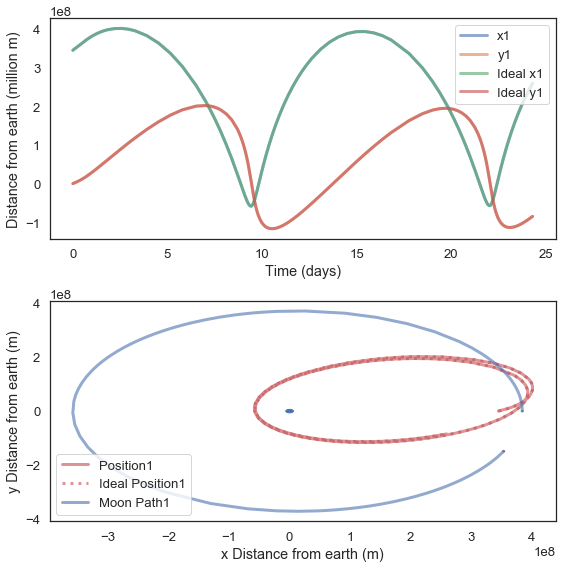

In [56]:
def plot_position2(results):
    unpack(system)
    count = 1
    
 
    subplot(2,1,1) # Plots x and y over time. Not terribly useful
    for result in results:
        result.index /= 60*60*24 #convert seconds to days

        plot(result.x, label='x'+str(count))
        plot(result.y, label = 'y'+ str(count))
        plot(result.xi, label='Ideal x'+str(count))
        plot(result.yi, label = 'Ideal y'+ str(count))
        count +=1
    decorate(xlabel='Time (days)',
             ylabel='Distance from earth (million m)')
    
    subplot(2,1,2) #Plots x against y creating 
    count = 1
    fig = plt.gcf()
    ax = fig.gca()
    circle1 = plt.Circle((384472281, 0), 1736482, color='g',label = "Moon Start")
    circle2 = plt.Circle((0, 0), 6371000, color='b', label = "Earth")
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    for result in results:
        plot(result.x,result.y,"r", label = 'Position'+str(count),)
        plot(result.xi,result.yi,":r", label = 'Ideal Position'+str(count))
        plot(result.mx,result.my, label = 'Moon Path' + str(count))
        circle = plt.Circle((get_last_value(result.mx), get_last_value(result.my)), 1736482, color='r',label = "Moon End"+str(count))
        ax.add_artist(circle)
        count +=1

    decorate(xlabel='x Distance from earth (m)',
             ylabel='y Distance from earth (m)')
plot_position2([results6])

### Animation Stuffs

In [57]:
def anim(results):

    plt.rcParams["animation.html"] = "jshtml"
    t = results

    fig, ax = plt.subplots();
    ax.axis([-4e8, 4e8, -4e8, 4e8]);
    circle1 = plt.Circle((384472281, 0), 1736482, color='g',label = "Moon Start")
    circle2 = plt.Circle((0, 0), 6371000, color='b', label = "Earth")
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    l, = ax.plot([],[]);
    l1, = ax.plot([],[]);
    #l2, = ax.plot([],[]);

    def animate(i):
        l.set_data(results.mx[results.index[:i]], results.my[results.index[:i]]);
        l1.set_data(results.x[results.index[:i]], results.y[results.index[:i]]);
        #l2.set_data(results.xi[results.index[:i]], results.yi[results.index[:i]]);

    ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t.index));
    return ani

ani = anim(results3)

NameError: name 'results3' is not defined

In [ ]:
anim(results5)